Lütfen çalmak istediğiniz notaları aralarında boşluk bırakarak giriniz (örn: 'B4 B4 C5 D5 D5') : B4 B4 C5 D5 D5 C5 B4 A4 G4 G4 A4 B4 B4 A4 A4
Lütfen notaların sürelerini aralarında boşluk bırakarak giriniz (örn: '0.5 0.5 0.5 0.5 0.5') : 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 1.0


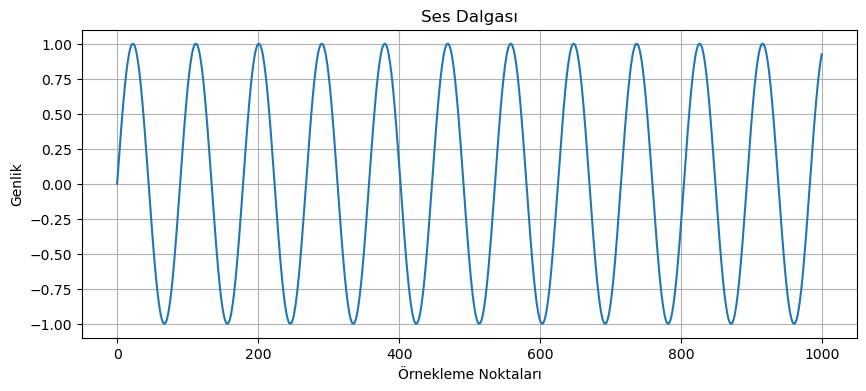

In [1]:
# Kullanılacak kütüphaneleri import edilmesi
import numpy as np
import sounddevice as sd
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Örnek hızı (örnekleme hızı)
samp_rate = 44100

# Nota frekanslarını belirleyen bir sözlük oluşturulması
note_freqs = {
    'A4': 440.00,
    'A#4': 466.16,
    'B4': 493.88,
    'C5': 523.25,
    'C#5': 554.37,
    'D5': 587.33,
    'D#5': 622.25,
    'E5': 659.25,
    'F5': 698.46,
    'F#5': 739.99,
    'G4': 392.00,
    'G#4': 415.30,
    'A5': 880.00,
    'A#5': 932.33,
    'B5': 987.77,
    'C6': 1046.50,
    'C#6': 1108.73,
    'D6': 1174.66,
    'D#6': 1244.51,
    'E6': 1318.51,
    'F6': 1396.91,
    'F#6': 1479.98,
    'G5': 783.99,
    'G#5': 830.61,
    'A6': 1760.00
}

# Kullanıcıdan nota girişi alınması
notes_input = input("Lütfen çalmak istediğiniz notaları aralarında boşluk bırakarak giriniz (örn: 'B4 B4 C5 D5 D5') : ")
notes = notes_input.split()

# Nota sürelerini kullanıcıdan alınması
durations_input = input("Lütfen notaların sürelerini aralarında boşluk bırakarak giriniz (örn: '0.5 0.5 0.5 0.5 0.5') : ")
durations = [float(duration) for duration in durations_input.split()]

# Melodiyi oluşturmak için her notayı ve süresini tek tek işlenecek
melody = np.array([])
for note, duration in zip(notes, durations):
    # Zaman dizisi t oluşturuluyor
    t = np.linspace(0, duration, int(samp_rate * duration), False)

    # Sinüs fonksiyonu kullanılarak, belirtilen frekansta bir ses dalgası oluşturulur
    single_note = np.sin(note_freqs[note] * t * 2 * np.pi)

    # Her bir ses dalgası melodinin sonuna eklenir
    melody = np.append(melody, single_note)

# Ses dalgasını normalleştirir
audio = melody * (2**15 - 1) / np.max(np.abs(melody))
audio = audio.astype(np.int16)

# Ses çalma
sd.play(audio, samp_rate)

# Sesin bitmesini bekler
sd.wait()

# Ses dalgasının grafiğini çizme
samples = melody[:1000]
indices = np.arange(len(samples))
plt.figure(figsize=(10, 4))
plt.plot(indices, samples)
plt.title('Ses Dalgası')
plt.xlabel('Örnekleme Noktaları')
plt.ylabel('Genlik')
plt.grid(True)
plt.show()

# Ses dosyasını kaydetme
wavfile.write('output.wav', samp_rate, audio)


# 9. Senfoni: B4 B4 C5 D5 D5 C5 B4 A4 G4 G4 A4 B4 B4 A4 A4
# Nota Süreleri: 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 1.0
